This is a script meant to start learning geoplotting with iPyLeaflet interactive widget library.

Author : Srinath Sibi , source : https://ipyleaflet.readthedocs.io/en/latest/installation.html#using-conda

Unlike geopandas, this library works well with conda and jupyter labs. 

To get started:
1. Clone this repo ( run git clone https://github.com/srinathsibi/DataVizForSocialDistancing.git . ) once you open terminal in a new folder.

2. Install conda : https://docs.conda.io/projects/conda/en/latest/user-guide/install/

3. Create a new conda environment (conda create --name < Insert environment details >)

4. Activate the conda environment ( conda activate < Insert environment details >)

5. Install ipyleaflet and associated dependencies using the documentation link above.

6. Add matplotlib to the conda environment ( conda install -c conda-forge matplotlib )

7. Run the scripts in the notebook by each cell.

For any questions, please email me.

In [1]:
from ipyleaflet import Map, Marker

center = (52.204793, 360.121558)

m= Map(center=center, zoom=15)

marker = Marker(location=center, draggable=True)

m.add_layer(marker)

display(m)

# Marker locations can be adjusted with ease in terminal or in the code
# as shown below

marker.location = (50,356)

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Markers can also use call backs when needed and we can identify the new position the marker was moved to using the event[new] variable

In [2]:
def on_location_change(event):
    #print ("The location was changed by Lat:  ", (event['new'][0] - 50.0) , " and Long: ", (event['new'] -356.0))
    pass

marker.observe(on_location_change , 'location')

marker.location = (51.0 , 357.0)

display(m)

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

A Simple true color plot of NY on a day that we want. It helps to see the weather on the day of interest if we want

In [3]:
from ipyleaflet import basemaps , basemap_to_tiles

m = Map( 
    layers =(basemap_to_tiles(basemaps.Esri.NatGeoWorldMap, "2020-04-01"), ),
    center = (40.7128 , -74.0060),
    zoom=8
       )
display(m)

Map(center=[40.7128, -74.006], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Now we explore the addition of tile layers, logos and markers to maps.

In [4]:
from ipyleaflet import Map, basemaps, basemap_to_tiles , Marker , Icon

NYC_Coords = (40.7128 , -74.0060)

#Define the map
m = Map(center = NYC_Coords , zoom = 8)
#define the layers to be added
# A marker
marker = Marker(location = NYC_Coords, draggable = True , title ="My New York" , opacity = 1)
# An Icon
icon = Icon(icon_url='Data/T.png', icon_size = [30,30] , icon_anchor=[0,0])
marker_icon = Marker(location = (41.5 , -73.0) , icon = icon )
# A basemap
dark_matter_layer = basemap_to_tiles(basemaps.CartoDB.DarkMatter)
# Add the basemap
m.add_layer(dark_matter_layer)
# Add te marker
m.add_layer(marker)
# Add Icon
m.add_layer(marker_icon)
display(m)

Map(center=[40.7128, -74.006], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Now we move on to building heatmaps. The same principal applies, we have a map on which we add a Layer. In this script, we test the mechanism of adding a point of interest on Manhattan and RI and an attached intensity level (randomly chosen).

In order to see the heat points, zoom in 2x. If we so desire, the radius of the heat point, can be adjusted to see from greater zoom.

In [6]:
from ipyleaflet import Map, Heatmap, FullScreenControl
from random import uniform

NYC_Coords = (40.7128 , -74.0060)
RI_Coords = (40.761927, -73.950093)
RADIUS = 10

m = Map( 
    layers =(basemap_to_tiles(basemaps.Esri.NatGeoWorldMap, "2020-04-01"), ),
    center = (40.7128 , -74.0060),
    zoom=8
       )
#latitudes are between -90 and 90, but areas close to the pole are not indexable
# Longitudes are between -180 and 180
#This is a sample plot with 
heatmap = Heatmap(
    #If we want random locations, we can use the definition of locations below
    #locations=[[uniform(-80,80) , uniform(-180, 180) , uniform(0,1000)] for i in range(1000)],
    locations=[ [NYC_Coords[0] , NYC_Coords[1], 50] , [RI_Coords[0],RI_Coords[1] , 200] ],
    radius = RADIUS
)
m.add_layer(heatmap);
m.add_control(FullScreenControl())
display(m)
locations=[[uniform(-80,80) , uniform(-180, 180) , uniform(0,1000)] for i in range(1000)]
print ("\n\nFirst Few elements of location are: \n", locations[0:10], '\n\nLength of locations: ' , len(locations))

Map(center=[40.7128, -74.006], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…



First Few elements of location are: 
 [[-9.604657751374091, 94.73654403019765, 917.6745810821039], [-77.59725749760912, 106.60482722983477, 720.0635057291154], [-72.64791904434185, -170.6495934991526, 834.053788412186], [-57.42933423992591, 52.846044906482206, 827.2540489003135], [36.39160984227237, -179.12441207245817, 425.38204388632283], [-68.54865553085291, 98.58980846765098, 640.2108461300871], [59.25064157514453, -49.289821571422124, 308.1245601731776], [68.52928739258383, 169.9707549522629, 574.5315054680045], [-69.85104336251379, 65.3740895658259, 872.0332331583136], [46.22914611790188, -178.89483623127774, 543.6798836834622]] 

Length of locations:  1000


### We now try to write a script to input random data and plot it on the map.

We will show the source plot of the data alongside for verification

Also we will add a feature where in we have split map controls if we need to check weather on the same day

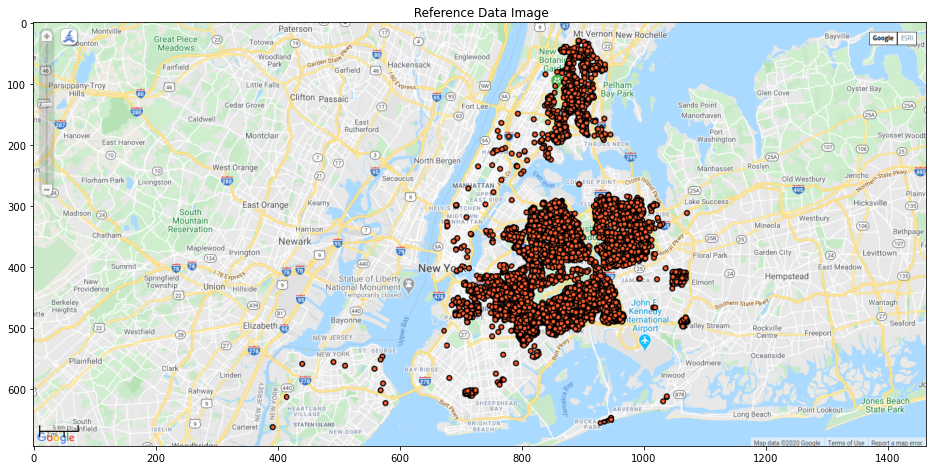

 Head of the data: 
     Latitude  Longitude  Asset_Area
0 -73.861573  40.846743       398.0
1 -73.887290  40.675633        63.0
2 -73.892668  40.674783        45.0
3 -73.892245  40.672691        50.0
4 -73.886813  40.673412        78.0 

Locations :  [40.8467431990937, -73.8615727671043, 398.0]  Type of the data in locations:  <class 'list'>


Map(center=[40.7128, -74.006], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [12]:
from ipyleaflet import Map, Heatmap, FullScreenControl
from ipyleaflet import basemap_to_tiles, SplitMapControl
from random import uniform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

NYC_Coords = (40.7128 , -74.0060)
RI_Coords = (40.761927, -73.950093)
RADIUS = 8
################################################
#Construction of the map
m = Map( 
    #layers =(basemap_to_tiles(basemaps.Esri.NatGeoWorldMap, "2020-04-01"), ),
    center = (40.7128 , -74.0060),
    zoom=8
       )
# Here we keep the right layer as such and change the left layer if we 
# need a better weather map under-layer

right_layer = (basemap_to_tiles(basemaps.Esri.NatGeoWorldMap, "2020-04-01"))
left_layer = (basemap_to_tiles(basemaps.NASAGIBS.ModisAquaTrueColorCR, "2020-04-01"))

control = SplitMapControl(left_layer=left_layer , right_layer=right_layer)
m.add_control(control)
m.add_control(FullScreenControl())
# Test display of map
#display(m)

################################################
# Showing the image that is a reference of the plot we are creating
img = mpimg.imread('Data/DEP Green Infrastructure NYC Open Data.png')
imgplot = plt.imshow(img)
plt.title(" Reference Data Image")
plt.show()

#################################################
# Now preparing the data
raw_data = pd.read_csv('Data/NYGreenInfrastructureAssets.csv')
# Test print the data
#print (" Head of the raw data : \n", raw_data.head(),'\n')
# Extract the relevant info and retain the dataframe structure
data = raw_data[['Latitude' , 'Longitude' , 'Asset_Area']]
# Test print the data
print(" Head of the data: \n" , data.head() , '\n')
# Now we make the locations list of lists from the columns of the data dataframe
locations = [ [ data.loc[i, "Longitude"] , data.loc[i, "Latitude"] , data.loc[i, "Asset_Area"] ] for i in range(len(data))]
print ("Locations : ", locations[0] , " Type of the data in locations: " , type(locations) )

##################################################
# Adding the heat map layer
heatmap = Heatmap( locations = locations , radius = RADIUS)
m.add_layer(heatmap);

display(m)